# 1. Reading and understanding data

In [535]:
import pandas as pd
df=pd.read_csv('housing.csv')

In [536]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [537]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [538]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Visualisation

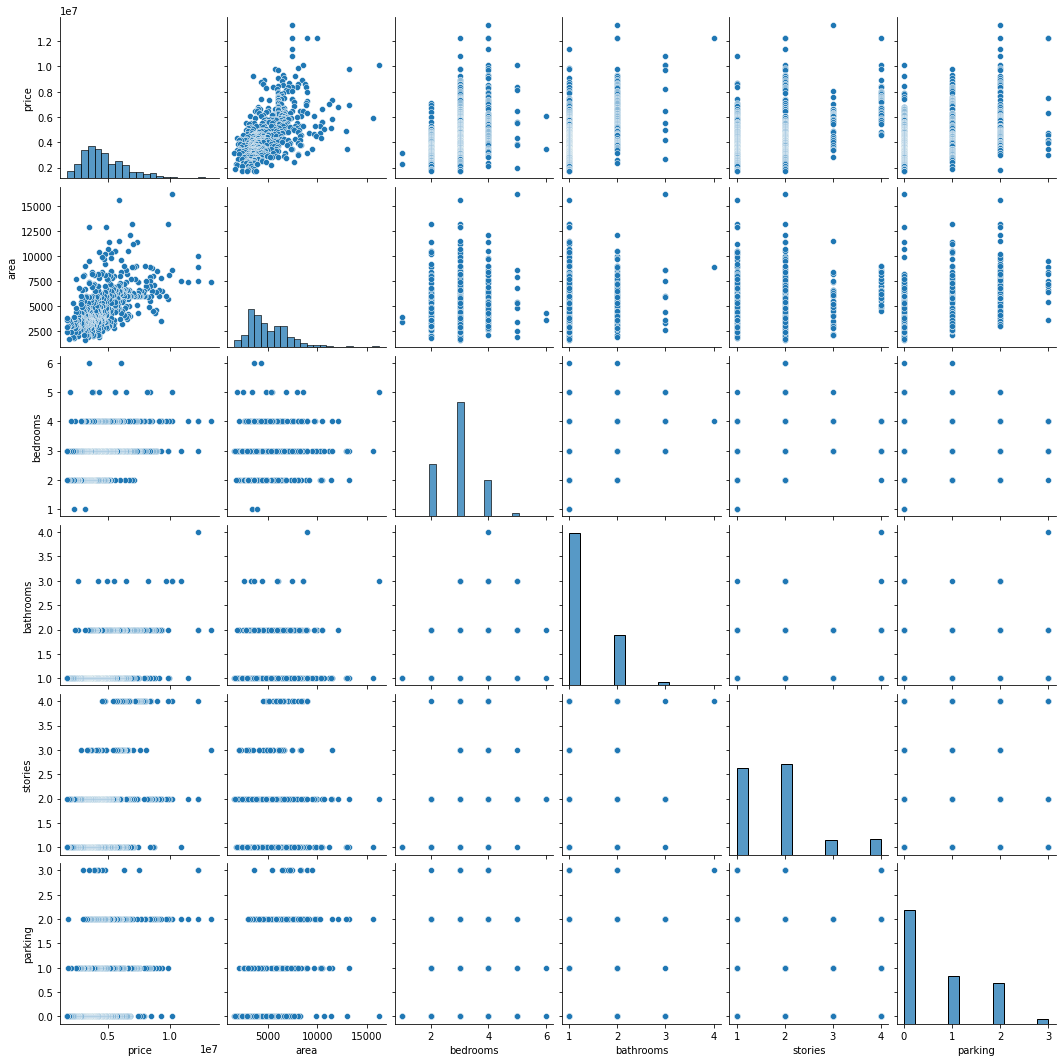

In [539]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)

<AxesSubplot:xlabel='mainroad', ylabel='price'>

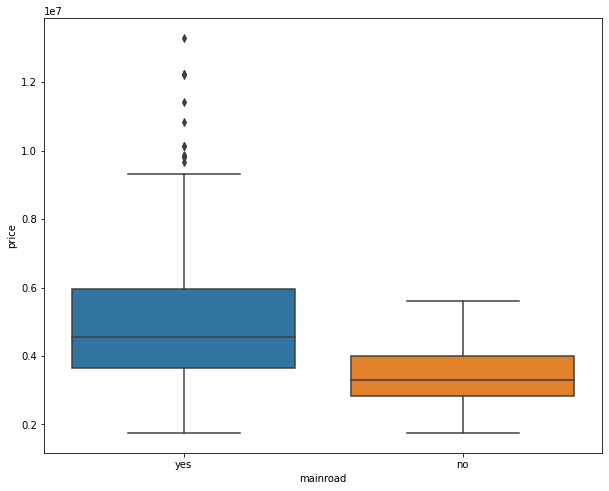

In [540]:
plt.figure(figsize=(10,8))
sns.boxplot(x='mainroad',y='price',data=df)

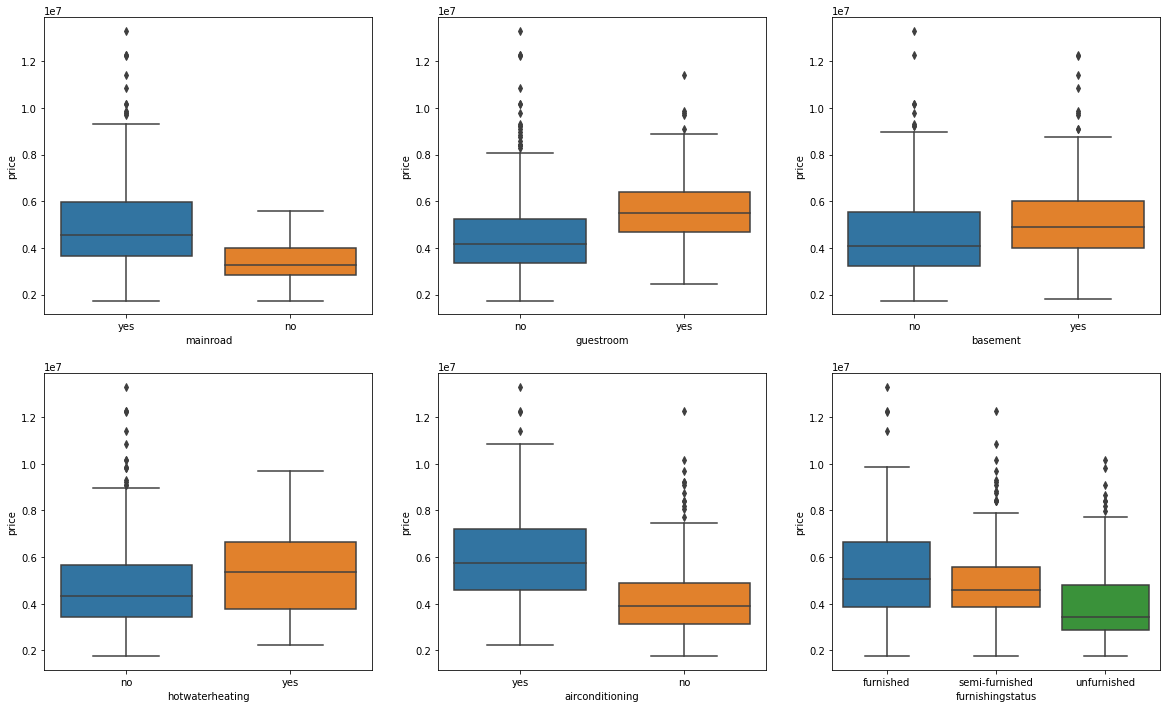

In [541]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='mainroad',y='price',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='guestroom',y='price',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='basement',y='price',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='hotwaterheating',y='price',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='airconditioning',y='price',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='furnishingstatus',y='price',data=df)
plt.show()

In [542]:
df.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [543]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

## Coverting yes and no to 1 and 0

In [544]:
varlist=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[varlist]=df[varlist].apply(lambda x:x.map({'yes':1,'no':0}))
df[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [545]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


## for funishing status , using dummy variables

In [546]:
status=pd.get_dummies(df['furnishingstatus'],drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


## concatening dummy values with main dataframe

In [547]:
df=pd.concat([df,status],axis=1)

In [548]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [549]:
df=df.drop('furnishingstatus',axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


# 2.Splitting into train and test

In [550]:
import sklearn
from sklearn.model_selection import train_test_split

df_train,df_test=train_test_split(df,train_size=.70,random_state=100)


In [551]:
df_test

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3430000,1950,3,2,2,1,0,1,0,0,0,1,0,1
191,5040000,10700,3,1,2,1,1,1,0,0,0,0,1,0
310,4130000,5985,3,1,1,1,0,1,0,0,0,0,1,0
46,7525000,6000,3,2,4,1,0,0,0,1,1,0,0,0


# Rescaling variables between 0 and 1 ( normalisation). other method is standardisatio

In [552]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
num_vars=['area','bedrooms','bathrooms','stories','parking','price']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train[num_vars].describe()

,area,bedrooms,bathrooms,stories,parking,price
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.288710,0.386352,0.136483,0.268591,0.242345,0.260333
std,0.181420,0.147336,0.237325,0.295001,0.285933,0.157607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.155227,0.200000,0.000000,0.000000,0.000000,0.151515
50%,0.234424,0.400000,0.000000,0.333333,0.000000,0.221212
75%,0.398099,0.400000,0.500000,0.333333,0.333333,0.345455
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3. Traninig the model

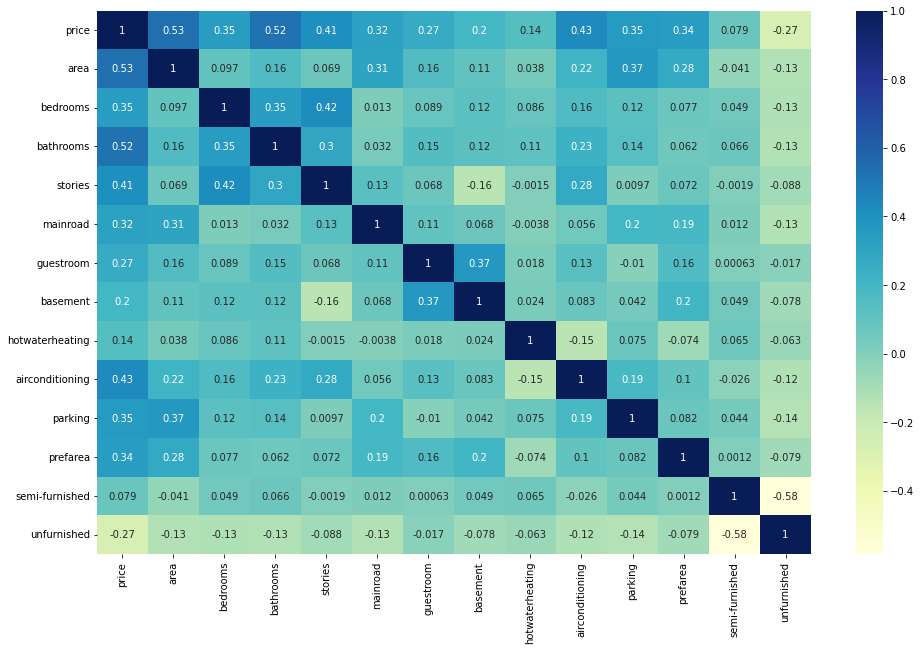

In [553]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [554]:
y_train=df_train.pop('price')
X_train=df_train
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [555]:
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

### A. Starting with single variable and then keep adding one variable at a time. We see in correlation heatmapt that area is higly correlated with price. Lets pick that.

In [556]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train['area'])

In [557]:
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           3.15e-29
Time:                        13:15:14   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [558]:
X_train_sm=sm.add_constant(X_train[['area','bathrooms']])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           2.51e-54
Time:                        13:15:14   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [559]:
X_train_sm=sm.add_constant(X_train[['area','bathrooms','stories']])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     150.7
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           3.56e-64
Time:                        13:15:14   Log-Likelihood:                 313.95
No. Observations:                 381   AIC:                            -619.9
Df Residuals:                     377   BIC:                            -604.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0746      0.011      6.667      0.000       0.053       0.097
area           0.3934      0.031     12.859      0.000       0.333       0.454
bathrooms      0.2463      0.024     10.085      0.000       0.198       0.294
stories        0.1434      0.019      7.382      0.000       0.105       0.182
==============================================================================
Omnibus:                       75.584   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.577
Skew:                           0.897   Prob(JB):                     1.41e-50
Kurtosis:                       6.353   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [560]:
X_train_sm=sm.add_constant(X_train[['area','bathrooms','stories','airconditioning']])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     130.2
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           1.14e-69
Time:                        13:15:14   Log-Likelihood:                 329.46
No. Observations:                 381   AIC:                            -648.9
Df Residuals:                     376   BIC:                            -629.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0719      0.011      6.677      0.000       0.051       0.093
area                0.3620      0.030     12.094      0.000       0.303       0.421
bathrooms           0.2286      0.024      9.651      0.000       0.182       0.275
stories             0.1187      0.019      6.187      0.000       0.081       0.156
airconditioning     0.0696      0.012      5.647      0.000       0.045       0.094
==============================================================================
Omnibus:                       82.202   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.090
Skew:                           0.994   Prob(JB):                     1.99e-52
Kurtosis:                       6.324   Cond. No.                         6.81
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [561]:
X_train_sm=sm.add_constant(X_train[['area','bathrooms','stories','airconditioning','bedrooms']])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     106.2
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           1.30e-69
Time:                        13:15:14   Log-Likelihood:                 331.89
No. Observations:                 381   AIC:                            -651.8
Df Residuals:                     375   BIC:                            -628.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0443      0.017      2.672      0.008       0.012       0.077
area                0.3595      0.030     12.064      0.000       0.301       0.418
bathrooms           0.2155      0.024      8.860      0.000       0.168       0.263
stories             0.1034      0.020      5.084      0.000       0.063       0.143
airconditioning     0.0695      0.012      5.668      0.000       0.045       0.094
bedrooms            0.0888      0.041      2.191      0.029       0.009       0.169
==============================================================================
Omnibus:                       73.229   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.153
Skew:                           0.902   Prob(JB):                     1.27e-44
Kurtosis:                       6.079   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [562]:
X_train_sm=sm.add_constant(X_train[['area','bathrooms','stories','airconditioning','bedrooms','parking']])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     93.30
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           3.15e-71
Time:                        13:15:15   Log-Likelihood:                 338.15
No. Observations:                 381   AIC:                            -662.3
Df Residuals:                     374   BIC:                            -634.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0430      0.016      2.633      0.009       0.011       0.075
area                0.3234      0.031     10.406      0.000       0.262       0.385
bathrooms           0.2108      0.024      8.787      0.000       0.164       0.258
stories             0.1102      0.020      5.476      0.000       0.071       0.150
airconditioning     0.0644      0.012      5.293      0.000       0.040       0.088
bedrooms            0.0763      0.040      1.904      0.058      -0.002       0.155
parking             0.0696      0.020      3.535      0.000       0.031       0.108
==============================================================================
Omnibus:                       62.894   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.716
Skew:                           0.808   Prob(JB):                     5.66e-35
Kurtosis:                       5.706   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [563]:
X_train_sm=sm.add_constant(X_train[['area','bathrooms','stories','airconditioning','parking']])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     110.5
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           1.71e-71
Time:                        13:15:15   Log-Likelihood:                 336.31
No. Observations:                 381   AIC:                            -660.6
Df Residuals:                     375   BIC:                            -637.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0665      0.011      6.218      0.000       0.045       0.088
area                0.3238      0.031     10.382      0.000       0.262       0.385
bathrooms           0.2218      0.023      9.492      0.000       0.176       0.268
stories             0.1236      0.019      6.534      0.000       0.086       0.161
airconditioning     0.0642      0.012      5.262      0.000       0.040       0.088
parking             0.0729      0.020      3.704      0.000       0.034       0.112
==============================================================================
Omnibus:                       69.890   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.165
Skew:                           0.885   Prob(JB):                     7.55e-40
Kurtosis:                       5.866   Cond. No.                         7.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [564]:
X_train_sm=sm.add_constant(X_train[['area','bathrooms','stories','airconditioning','prefarea','parking']])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     105.4
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           2.83e-77
Time:                        13:15:15   Log-Likelihood:                 352.42
No. Observations:                 381   AIC:                            -690.8
Df Residuals:                     374   BIC:                            -663.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0645      0.010      6.277      0.000       0.044       0.085
area                0.2778      0.031      8.966      0.000       0.217       0.339
bathrooms           0.2219      0.022      9.894      0.000       0.178       0.266
stories             0.1191      0.018      6.555      0.000       0.083       0.155
airconditioning     0.0621      0.012      5.300      0.000       0.039       0.085
prefarea            0.0703      0.012      5.746      0.000       0.046       0.094
parking             0.0757      0.019      4.006      0.000       0.039       0.113
==============================================================================
Omnibus:                       78.372   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.446
Skew:                           0.940   Prob(JB):                     5.52e-51
Kurtosis:                       6.323   Cond. No.                         7.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [565]:
X_train_sm=sm.add_constant(X_train[['area','bathrooms','stories','airconditioning','prefarea','parking','mainroad']])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     95.42
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           3.62e-79
Time:                        13:15:15   Log-Likelihood:                 359.35
No. Observations:                 381   AIC:                            -702.7
Df Residuals:                     373   BIC:                            -671.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0289      0.014      2.076      0.039       0.002       0.056
area                0.2514      0.031      8.036      0.000       0.190       0.313
bathrooms           0.2268      0.022     10.266      0.000       0.183       0.270
stories             0.1101      0.018      6.107      0.000       0.075       0.146
airconditioning     0.0645      0.012      5.584      0.000       0.042       0.087
prefarea            0.0652      0.012      5.378      0.000       0.041       0.089
parking             0.0676      0.019      3.614      0.000       0.031       0.104
mainroad            0.0554      0.015      3.718      0.000       0.026       0.085
==============================================================================
Omnibus:                       86.750   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              263.871
Skew:                           1.031   Prob(JB):                     5.03e-58
Kurtosis:                       6.517   Cond. No.                         9.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [566]:
X_train_sm=sm.add_constant(X_train[['guestroom','area','bathrooms','stories','airconditioning','prefarea','parking','mainroad']])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     86.55
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           3.71e-80
Time:                        13:15:15   Log-Likelihood:                 364.10
No. Observations:                 381   AIC:                            -710.2
Df Residuals:                     372   BIC:                            -674.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0283      0.014      2.058      0.040       0.001       0.055
guestroom           0.0408      0.013      3.063      0.002       0.015       0.067
area                0.2427      0.031      7.811      0.000       0.182       0.304
bathrooms           0.2188      0.022      9.941      0.000       0.176       0.262
stories             0.1110      0.018      6.223      0.000       0.076       0.146
airconditioning     0.0615      0.011      5.366      0.000       0.039       0.084
prefarea            0.0611      0.012      5.064      0.000       0.037       0.085
parking             0.0732      0.019      3.938      0.000       0.037       0.110
mainroad            0.0525      0.015      3.552      0.000       0.023       0.082
==============================================================================
Omnibus:                       86.638   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.727
Skew:                           1.019   Prob(JB):                     9.89e-60
Kurtosis:                       6.601   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [567]:
X_train_sm=sm.add_constant(X_train[['basement','guestroom','area','bathrooms','stories','airconditioning','prefarea','parking','mainroad']])
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     78.60
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           1.97e-80
Time:                        13:15:15   Log-Likelihood:                 367.10
No. Observations:                 381   AIC:                            -714.2
Df Residuals:                     371   BIC:                            -674.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0210      0.014      1.501      0.134      -0.007       0.049
basement            0.0274      0.011      2.428      0.016       0.005       0.050
guestroom           0.0292      0.014      2.078      0.038       0.002       0.057
area                0.2439      0.031      7.899      0.000       0.183       0.305
bathrooms           0.2122      0.022      9.629      0.000       0.169       0.255
stories             0.1219      0.018      6.669      0.000       0.086       0.158
airconditioning     0.0596      0.011      5.221      0.000       0.037       0.082
prefarea            0.0564      0.012      4.644      0.000       0.032       0.080
parking             0.0729      0.018      3.949      0.000       0.037       0.109
mainroad            0.0513      0.015      3.494      0.001       0.022       0.080
==============================================================================
Omnibus:                       87.660   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.052
Skew:                           1.027   Prob(JB):                     4.19e-61
Kurtosis:                       6.646   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### B. Now lets reverse the appraoch. Pick all the values at once and start removing variables one by one

In [568]:
X_train_sm=sm.add_constant(X_train)

In [569]:
lr_model=sm.OLS(y_train,X_train_sm).fit()

In [570]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           8.83e-83
Time:                        13:15:15   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Apart from constant , many variables has p-value > 0.05 . but we cannot drop variables from model just on the basis of p-value. Lets see the VIF of all variables

In [571]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [572]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


#### 1) High P -valeu and high VIF --we can drop
#### 2) High P value and low VIF --Pick this scenario first. Drop the column and check the VIF again for remaining columns
#### 3) Low P value and High VIF-- after 2nd scenario, try this one
#### 4) low p value and low VIF-- we can keep

In [573]:
X=X_train.drop('semi-furnished',axis=1)

In [574]:
X_train_sm=sm.add_constant(X)
lr_model=sm.OLS(y_train,X_train_sm).fit()

In [575]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           1.07e-83
Time:                        13:15:15   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [576]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [577]:
X=X.drop('bedrooms',axis=1)

In [578]:
X_train_sm=sm.add_constant(X)
lr_model=sm.OLS(y_train,X_train_sm).fit()

In [579]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           2.73e-84
Time:                        13:15:15   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [580]:
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


# 4.Residual Analysis 

In [581]:
y_train_pred=lr_model.predict(X_train_sm)

c:\users\girleffect\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


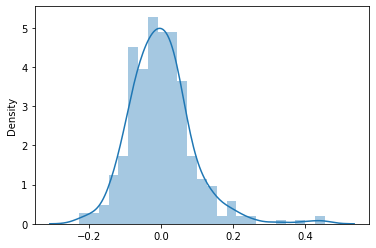

In [582]:
res=y_train-y_train_pred
sns.distplot(res)
plt.show()

# 5.Predictions and Evaluation on the test

In [583]:
num_vars=['area','bedrooms','bathrooms','stories','parking','price']
df_test[num_vars]=scaler.transform(df_test[num_vars]) #only transform not fit_transform, interpolation not extrapolation

In [584]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [585]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [586]:
y_test=df_test.pop('price')
X_test=df_test
X_test_sm=sm.add_constant(X_test)
X_test_sm

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,1.0,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,1.0,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,1.0,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,1.0,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,1.0,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.0,0.010032,0.4,0.5,0.333333,1,0,1,0,0,0.000000,1,0,1
191,1.0,0.780007,0.4,0.0,0.333333,1,1,1,0,0,0.000000,0,1,0
310,1.0,0.365100,0.4,0.0,0.000000,1,0,1,0,0,0.000000,0,1,0
46,1.0,0.366420,0.4,0.5,1.000000,1,0,0,0,1,0.333333,0,0,0


In [587]:
X_test_sm=X_test_sm.drop(['bedrooms','semi-furnished'],axis=1)

In [588]:
y_test_pred=lr_model.predict(X_test_sm)

In [589]:
from sklearn.metrics import r2_score

In [590]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.6713505684480789

# C. Variable Selection Using RFE

In [591]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [592]:
df_train,df_test=train_test_split(df,train_size=.70,random_state=100)

scaler=MinMaxScaler()
num_vars=['area','bedrooms','bathrooms','stories','parking','price']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

y_train=df_train.pop('price')
X_train=df_train

In [593]:
lm=LinearRegression()

In [594]:
lm.fit(X_train,y_train)
rfe=RFE(lm,n_features_to_select=10)
rfe=rfe.fit(X_train,y_train)

In [595]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [596]:
col=X_train.columns[rfe.support_]
col

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [597]:
X_train.columns[~rfe.support_]

Index(['basement', 'semi-furnished', 'unfurnished'], dtype='object')

In [598]:
X_train_rfe=X_train[col]

In [599]:
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_rfe)

In [600]:
ls=sm.OLS(y_train,X_train_rfe).fit()

In [601]:
ls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           1.28e-82
Time:                        13:15:17   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018      0.151      0.880      -0.033       0.038
area                0.2363      0.030      7.787      0.000       0.177       0.296
bedrooms            0.0661      0.037      1.794      0.074      -0.006       0.139
bathrooms           0.1982      0.022      8.927      0.000       0.155       0.242
stories             0.0977      0.019      5.251      0.000       0.061       0.134
mainroad            0.0556      0.014      3.848      0.000       0.027       0.084
guestroom           0.0381      0.013      2.934      0.004       0.013       0.064
hotwaterheating     0.0897      0.022      4.104      0.000       0.047       0.133
airconditioning     0.0711      0.011      6.235      0.000       0.049       0.093
parking             0.0637      0.018      3.488      0.001       0.028       0.100
prefarea            0.0643      0.012      5.445      0.000       0.041       0.088
==============================================================================
Omnibus:                       86.105   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.069
Skew:                           0.992   Prob(JB):                     7.60e-63
Kurtosis:                       6.753   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [602]:
X_train_new=X_train_rfe.drop('bedrooms',axis=1)

In [603]:
X_train_new

,const,area,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
359,1.0,0.155227,0.0,0.000000,1,0,0,0,0.333333,0
19,1.0,0.403379,0.5,0.333333,1,0,0,1,0.333333,1
159,1.0,0.115628,0.5,0.000000,1,1,0,1,0.000000,0
35,1.0,0.454417,0.5,1.000000,1,0,0,1,0.666667,0
28,1.0,0.538015,0.5,0.333333,1,0,1,0,0.666667,0
...,...,...,...,...,...,...,...,...,...,...
526,1.0,0.118268,0.0,0.000000,1,0,0,0,0.000000,0
53,1.0,0.291623,0.5,1.000000,1,0,0,1,0.666667,0
350,1.0,0.139388,0.0,0.333333,1,0,1,0,0.333333,0
79,1.0,0.366420,0.5,0.666667,1,1,0,1,0.000000,0


In [604]:
lr=sm.OLS(y_train,X_train_new).fit()

In [605]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           6.67e-83
Time:                        13:15:17   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013      1.794      0.074      -0.002       0.051
area                0.2367      0.030      7.779      0.000       0.177       0.297
bathrooms           0.2070      0.022      9.537      0.000       0.164       0.250
stories             0.1096      0.017      6.280      0.000       0.075       0.144
mainroad            0.0536      0.014      3.710      0.000       0.025       0.082
guestroom           0.0390      0.013      2.991      0.003       0.013       0.065
hotwaterheating     0.0921      0.022      4.213      0.000       0.049       0.135
airconditioning     0.0710      0.011      6.212      0.000       0.049       0.094
parking             0.0669      0.018      3.665      0.000       0.031       0.103
prefarea            0.0653      0.012      5.513      0.000       0.042       0.089
==============================================================================
Omnibus:                       91.542   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.402
Skew:                           1.044   Prob(JB):                     3.25e-69
Kurtosis:                       6.938   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [606]:
X=X_train_new.drop('const',axis=1)
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,area,4.52
3,mainroad,4.26
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
4,guestroom,1.30
5,hotwaterheating,1.12


## Residual Analysis

In [607]:
y_train_pred=lr.predict(X_train_new)

c:\users\girleffect\python\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

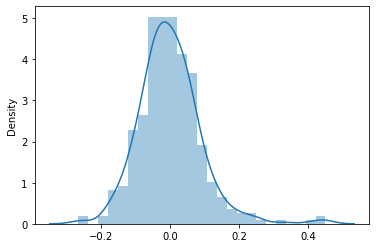

In [608]:
res=y_train-y_train_pred
sns.distplot(res)

## Making predictions

In [609]:
num_vars=['area','stories','parking','bathrooms','bedrooms','price']

In [610]:
df_test[num_vars]=scaler.transform(df_test[num_vars])

c:\users\girleffect\python\python38\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [611]:
y_test=df_test.pop('price')
X_test=df_test
X_test_sm=sm.add_constant(X_test)
X_test_new=X_test_sm[X_train_new.columns]
y_test_pred=lr.predict(X_test_new)

Text(0, 0.5, 'y_test_pred')

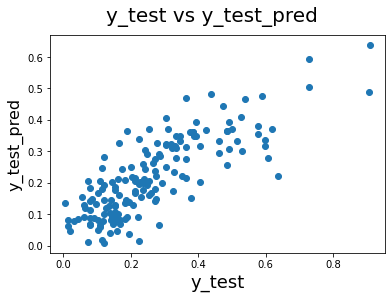

In [614]:
fig=plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred',fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_test_pred',fontsize=16)